In [2]:
"""
Support Vector Machine (SVM) - Hard Margin with RBF Kernal
-----------------------------------------------------------

Dual optimization problem:

minimize (1/2)*sum(alpha_i*alpha_j*y_i*K(x_i,x_j)) -sum(alpha_i)
subject to sum(alpha_i*y_i) = 0
           alpha_i >=0

where K(x_i,x_j) is the RBF kernal: K(x_i,x_j) = exp(-||x_i-x_j||^2 * gamma(ie.row in our code)

"""

import numpy as np
import pandas as pd
import math as math
from cvxopt import solvers,matrix
import matplotlib.pyplot as plt

# Load the dataset
d0=pd.read_csv("C:\\Users\\ayank\\Downloads\\archive\\train.csv")

# Filter rows where the label is 0 and 1
filtered_row0=d0[d0["label"]==0]
filtered_row1=d0[d0["label"]==1]

# Sample 500 examples from each class (0 and 1) for training
filtered_row_0=filtered_row0.sample(n=500,random_state=42)
filtered_row_1=filtered_row1.sample(n=500,random_state=42)

# Combine the two filtered sample into a new dataset
d0_new=pd.concat([filtered_row_0,filtered_row_1],ignore_index=True)

# Replace label '0' with '-1' for SVM classification
d0_new['label']=d0_new['label'].replace(0,-1)

# Separate features (d) and labels (l)
d=d0_new.drop("label",axis=1)
d=d/255.0 # Normalize the feature values
l=d0_new['label']

# Initialize the quadretic programming parameters for SVM
P=np.zeros((len(l),len(l))) # Quadratic term in the objective function
Q=-np.ones((len(l),1)) # Linear term in the objective function
Q=Q.astype(float) # Converting int to float
G=-np.eye(len(l)) # Inequality constraints (sum of alpha_i * y_i = 0)
G=G.astype(float) # Converting int to float
A=np.array(l,dtype=float).reshape(1,-1) # Equality constraint (sum of alpha_i * y_i =0)
A=A.astype(float) # Converting int to float
h=np.zeros((len(l),1)) # Upper bound for the inequality constraints
h=h.astype(float) # Again fucking Converting int to float
b=np.zeros(1) # The right-hand side of the equality constraint
b=b.astype(float) # Same shit again

# Input for RBF kernal parameter(row)
row=float(input("Row"))

# Compute the Gram matrix using the RBF kernal
for i in range(len(l)):
    for j in range(len(l)):
        # Calculate the difference between two feature vectors
        term=np.array(d.iloc[i])-np.array(d.iloc[j])
        # Compute the RBF kernal value (Gaussian similarity)
        term_2=np.dot(term,term.T)
        # Fill in the Gram matrix (P) for the quadratic optimization problem
        P[i,j]=l[i]*l[j]*math.exp(-term_2*row)
    print(i,end=",") # It just fucking tells you which example the program is on and confirms that your code is working and hasn't crashed
        
# Convert matrices into the format required by the cvxopt solver
P=matrix(P)
Q=matrix(Q)
G=matrix(G)
A=matrix(A)
h=matrix(h)
b=matrix(b)

# Solves the quadratic programming problem to find the optimal alphas
sol=solvers.qp(P,Q,G,h,A,b)
alpha=np.array(sol['x']) # Extract the solution (alphas)


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [3]:
# Calculate the bias term (z) using the support vectors
z_sum=0
count=0

for i in range(len(l)):
    if abs(sol['x'][i])>1e-5: # Check if alpha is a support vector
        sum_term=0
        for j in range(len(l)):
            # Compute the RBF kernal value for the support vector
            term=np.array(d.iloc[i])-np.array(d.iloc[j])
            term_2=np.dot(term,term.T)
            sum_term+=sol['x'][j]*l[j]*math.exp(-term_2*row)

        #Calculate bias term for each support vector
        c=l[i]-sum_term
        z_sum+=c
        count+=1
        print(count,end=",") # This is again indicator you can avoid this

#Average bias over all support vectors
if count>0:
    z=z_sum/count
else:
    z=0 # This handles the edge case where no support vectors are found

print("Bias (z):",z)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

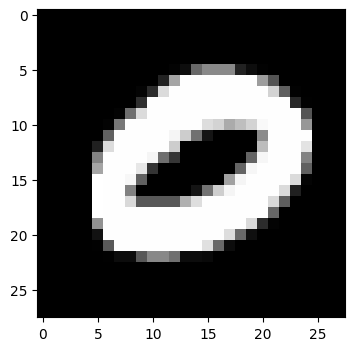

0 -1.0000021273925457


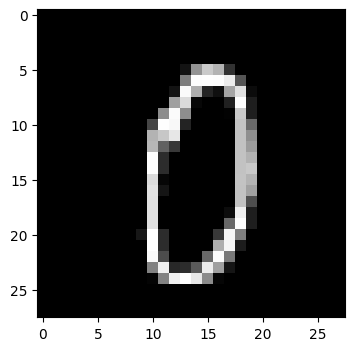

0 -1.0000021188002612


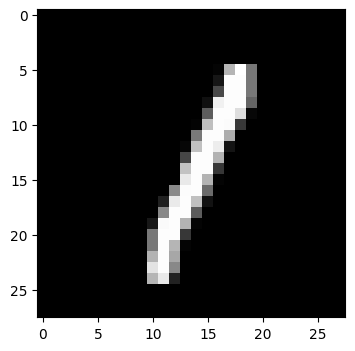

1 1.3069476080782771


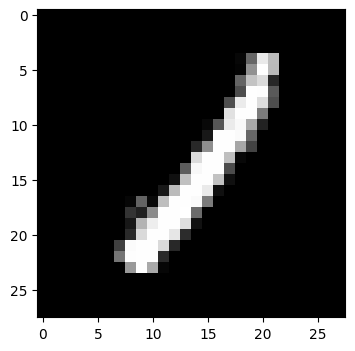

1 0.9999979033994865


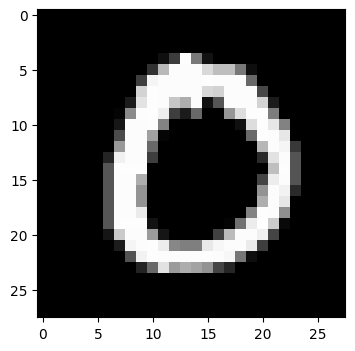

0 -1.0000090350645174


IndexError: single positional indexer is out-of-bounds

In [4]:
# Interactive testing loop to classify examples

while(True):

    r=int(input("Enter the rth example (example index): "))
    t=np.array(d.iloc[r])
    
    # Display the test example as a 28x28 image(assuming MNIST dataset)
    plt.figure(figsize=(4,4))
    idx=r
    grid_data=d.iloc[idx].values.reshape(28,28) # Reshape the feature vector into 28x28 image
    plt.imshow(grid_data,interpolation="none",cmap="gray")
    plt.show()

    # Predict the class for the test example using trained SVM model
    sum=0
    for i  in range(len(l)):
        term=np.array(d.iloc[i])-np.array(d.iloc[r])
        term_2=np.dot(term,term.T)
        sum=sum+sol['x'][i]*l[i]*math.exp(-term_2*row)

    # Decision rule: if sum + bias > 0,predict class 1; otherwise,class -1(ie 0)
    if(sum+z>0):
        print(1,sum+z)

    else:
        print(0,sum+z)